# T029 · GPCR data acquisition (GPCRdb)

**Note:** This talktorial is a part of TeachOpenCADD, a platform that aims to teach domain-specific skills and to provide pipeline templates as starting points for research projects.

Authors:

- Dominique Sydow, 2022, [Volkamer lab, Charité](https://volkamerlab.org/)

## Aim of this talktorial

Add a short summary of this talktorial's content.

### Contents in *Theory*

_Add Table of Contents (TOC) for Theory section._

* ChEMBL database
* Compound activity measures

<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: These points should refer to the headlines of your <i>Theory</i> section.

</div>

### Contents in *Practical*

_Add Table of Contents (TOC) for Practical section._

* Connect to ChEMBL database
* Load and draw molecules

<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: These points should refer to the headlines of your <i>Practical</i> section.

</div>

### References

* Paper 
* Tutorial links
* Other useful resources

*We suggest the following citation style:*
* Keyword describing resource: <i>Journal</i> (year), <b>volume</b>, pages (link to resource) 

*Example:*
* ChEMBL web services: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881) 

## Theory

### GPCRs

TODO

### GPCRdb overview 

The GPCRdb is a GPCR data resource, similar to the kinase resource KLIFS, full of receptor-level annotations:
- Links to ChEMBL, Guide to Pharmacology (GtoPDB), and UniProt
- Endogenous ligands
- Residue mutations
- Homology models (active, inactive, and/or intermediate state)
- PDB structures
- Structure-based sequence alignments across the GPCRome (using a [GPCRdb numbering scheme](https://docs.gpcrdb.org/generic_numbering.html))
- Tons of analysis tools, e.g. different tools to visualize residues within the transmembrane helices (TMs), structure comparison tools, and phylogenetic trees

### GPCRdb programmatic access

The GPCRdb has --- just like KLIFS --- a Swagger API (https://gpcrdb.org/services/), allowing us to fetch some of the data programmatically, e.g. using Python. I could not find a Swagger definitions that would allow us to dynamically generate a Python client with `bravado` but we can easily send requests with `requests`. 

We can send queries (e.g. for β2-adrenoceptor) based on the following terms:
- `entry_name`: UniProt entry name (adrb2_human)
- `slug`: GPCRdb slugs (001_001_003_008, i.e. *class_ligand_subfamily_subtype*)

Let's get receptor data on different levels:
- Protein
- Drugs
- Residues
- Structure
- Interactions

## Practical

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

Let's define some example receptor and structure:

In [2]:
query_receptor = "adrb2_human"
query_structure = "3SN6"

### Protein annotations for input receptor

In [3]:
def protein_by_entry_name(entry_name):
    """
    From the GPCRdb, get protein annotations associated with the input UniProt entry name.

    Parameters
    ----------
    entry_name : str
        UniProt entry name for GPCR of interest.

    Returns
    -------
    dict
        Protein annotations deposited in the GPCRdb.
    """

    url = f"https://gpcrdb.org/services/protein/{entry_name}/"
    response = requests.get(url)
    data = response.json()
    return data

In [4]:
protein_by_entry_name(query_receptor)

{'entry_name': 'adrb2_human',
 'name': '&beta;<sub>2</sub>-adrenoceptor',
 'accession': 'P07550',
 'family': '001_001_003_008',
 'species': 'Homo sapiens',
 'source': 'SWISSPROT',
 'residue_numbering_scheme': 'GPCRdb(A)',
 'sequence': 'MGQPGNGSAFLLAPNGSHAPDHDVTQERDEVWVVGMGIVMSLIVLAIVFGNVLVITAIAKFERLQTVTNYFITSLACADLVMGLAVVPFGAAHILMKMWTFGNFWCEFWTSIDVLCVTASIETLCVIAVDRYFAITSPFKYQSLLTKNKARVIILMVWIVSGLTSFLPIQMHWYRATHQEAINCYANETCCDFFTNQAYAIASSIVSFYVPLVIMVFVYSRVFQEAKRQLQKIDKSEGRFHVQNLSQVEQDGRTGHGLRRSSKFCLKEHKALKTLGIIMGTFTLCWLPFFIVNIVHVIQDNLIRKEVYILLNWIGYVNSGFNPLIYCRSPDFRIAFQELLCLRRSSLKAYGNGYSSNGNTGEQSGYHVEQEKENKLLCEDLPGTEDFVGHQGTVPSDNIDSQGRNCSTNDSLL',
 'genes': ['ADRB2', 'ADRB2R', 'B2AR']}

### Drug annotations for input receptor

In [5]:
def drugs_by_entry_name(entry_name):
    """
    From the GPCRdb, get drugs associated with input UniProt entry name.

    Parameters
    ----------
    entry_name : str
        UniProt entry name for GPCR of interest.

    Returns
    -------
    pandas.DataFrame
        Drug annotations deposited in the GPCRdb.
    """

    url = f"https://gpcrdb.org/services/drugs/{entry_name}/"
    response = requests.get(url)
    data = response.json()
    data = pd.DataFrame(data)
    return data

In [6]:
drugs_by_entry_name(query_receptor)

,name,approval,indication,status,drugtype,moa,novelty
0,albuterol,1981,chronic obstructive pulmonary disease (COPD),approved,small molecule,agonist,established
1,alprenolol,1966,Anti-Arrhythmia ; Antihypertensive,approved,small molecule,antagonist,established
2,arformoterol,2006,Bronchodilator,approved,small molecule,agonist,established
3,bitolterol,1984,obstructive lung disease,approved,small molecule,agonist,established
4,carteolol,1988,cardiovascular disease,approved,small molecule,antagonist,established
...,...,...,...,...,...,...,...
70,procaterol,-,Bronchodilator,"in trial (recruiting, 2015)",small molecule,agonist,established
71,pw2101,-,Antihypertensive,"in trial (discontinued, 2005)",small molecule,antagonist,established
72,syl040012,-,Antiglaucomic,"in trial (completed, 2014)",sirna,antagonist,established
73,vilanterol,-,chronic obstructive pulmonary disease (COPD),"in trial (ongoing, 2016)",small molecule,agonist,established


### Residue annotations for input receptor

In [7]:
def residues_by_entry_name(entry_name, assigned_residues_only=False):
    """
    From the GPCRdb, get residue annotations for input UniProt entry name.

    Parameters
    ----------
    entry_name : str
        UniProt entry name for GPCR of interest.
    assigned_residues_only : bool
        Report only residues with a generic number (default: False).

    Returns
    -------
    pandas.DataFrame
        Residue annotations deposited in the GPCRdb.
    """

    url = f"https://gpcrdb.org/services/residues/extended/{entry_name}/"
    response = requests.get(url)
    data = response.json()
    data = pd.DataFrame(data)
    if assigned_residues_only:
        data = data[data["display_generic_number"].notna()]
    return data

In [8]:
residues_by_entry_name(query_receptor, assigned_residues_only=True)

,sequence_number,amino_acid,protein_segment,display_generic_number,alternative_generic_numbers
25,26,Q,TM1,1.25x25,"[{'scheme': 'BW', 'label': '1.25'}, {'scheme':..."
26,27,E,TM1,1.26x26,"[{'scheme': 'BW', 'label': '1.26'}, {'scheme':..."
27,28,R,TM1,1.27x27,"[{'scheme': 'BW', 'label': '1.27'}, {'scheme':..."
28,29,D,TM1,1.28x28,"[{'scheme': 'BW', 'label': '1.28'}, {'scheme':..."
29,30,E,TM1,1.29x29,"[{'scheme': 'BW', 'label': '1.29'}, {'scheme':..."
...,...,...,...,...,...
336,337,Q,H8,8.55x55,"[{'scheme': 'BW', 'label': '8.55'}, {'scheme':..."
337,338,E,H8,8.56x56,"[{'scheme': 'BW', 'label': '8.56'}, {'scheme':..."
338,339,L,H8,8.57x57,"[{'scheme': 'BW', 'label': '8.57'}, {'scheme':..."
339,340,L,H8,8.58x58,"[{'scheme': 'BW', 'label': '8.58'}, {'scheme':..."


### Structure annotations for input receptor

In [9]:
def structures_by_entry_name(entry_name):
    """
    From the GPCRdb, get structure data for input UniProt entry name.

    Parameters
    ----------
    entry_name : str
        UniProt entry name for GPCR of interest.

    Returns
    -------
    pandas.DataFrame
        Structure annotations deposited in the GPCRdb.
    """

    url = f"https://gpcrdb.org/services/structure/protein/{entry_name}/"
    response = requests.get(url)
    data = response.json()
    data = pd.DataFrame(data)
    return data

In [10]:
structures = structures_by_entry_name(query_receptor)
print(f"Number of structures: {len(structures)}")
structures.head()

Number of structures: 37


,pdb_code,protein,family,species,preferred_chain,resolution,publication_date,type,state,distance,publication,ligands,signalling_protein
0,2RH1,adrb2_human,001_001_003_008,Homo sapiens,A,2.4,2007-10-30,X-ray diffraction,Inactive,None,https://dx.doi.org/10.1126/SCIENCE.1150577,"[{'name': 'Carazolol', 'type': 'small-molecule...",NaN
1,2R4R,adrb2_human,001_001_003_008,Homo sapiens,A,3.4,2007-11-06,X-ray diffraction,Inactive,None,https://dx.doi.org/10.1038/NATURE06325,[],NaN
2,2R4S,adrb2_human,001_001_003_008,Homo sapiens,A,3.4,2007-11-06,X-ray diffraction,Inactive,None,None,[],NaN
3,3D4S,adrb2_human,001_001_003_008,Homo sapiens,A,2.8,2008-06-17,X-ray diffraction,Inactive,None,https://dx.doi.org/10.1016/J.STR.2008.05.001,"[{'name': 'timolol', 'type': 'small-molecule',...",NaN
4,3KJ6,adrb2_human,001_001_003_008,Homo sapiens,A,3.4,2010-02-16,X-ray diffraction,Inactive,None,https://dx.doi.org/10.1038/NATURE08650,[],NaN


In [11]:
structures.groupby("state").size()

state
Active      13
Inactive    24
dtype: int64

### Interaction annotations for input structure

In [12]:
def interactions_by_pdb_id(pdb_id):
    """
    From the GPCRdb, get interactions between structure and ligand for input PDB ID.

    Parameters
    ----------
    pdb_id : str
        PDB ID for GPCR structure of interest.

    Returns
    -------
    pandas.DataFrame
        Interactions reported in the GPCRdb for input structure.
    """

    url = f"https://gpcrdb.org/services/structure/{pdb_id}/interaction/"
    response = requests.get(url)
    data = response.json()
    data = pd.DataFrame(data)
    return data

In [13]:
interactions = interactions_by_pdb_id(query_structure)
print(f"Number of structures: {len(interactions)}")
interactions.head()

Number of structures: 36


,pdb_code,ligand_name,amino_acid,sequence_number,display_generic_number,interaction_type
0,3SN6,BI-167107,W,109,3.28x28,accessible
1,3SN6,BI-167107,W,109,3.28x28,hydrophobic
2,3SN6,BI-167107,T,110,3.29x29,accessible
3,3SN6,BI-167107,D,113,3.32x32,polar (charge-charge)
4,3SN6,BI-167107,D,113,3.32x32,accessible


### Case study: Receptor interaction profile for β2-adrenoceptor

In [14]:
def interactions_by_entry_name(entry_name, state=None):
    """
    From the GPCRdb, get interactions for all structures associated with
    the input UniProt entry name.

    Parameters
    ----------
    pdb_id : str
        PDB ID for GPCR structure of interest.
    state : None or str
        Optional: Filter for structures in a specific receptor state (active, inactive).

    Returns
    -------
    pandas.DataFrame
        Interactions reported in the GPCRdb for all structures for the input GPCR.
    """

    # Get all structures
    structures = structures_by_entry_name(entry_name)
    structures["state"] = structures["state"].str.lower()
    states = structures["state"].unique().tolist()

    # Select state
    if state is None:
        pass
    elif state.lower() in states:
        structures = structures[structures["state"] == state.lower()]
    else:
        raise KeyError(f"Unknown state {state}; choose from {states}")

    # Get interactions for all structures
    pdb_ids = structures["pdb_code"].to_list()
    receptor_interactions = []
    for pdb_id in pdb_ids:
        structure_interactions = interactions_by_pdb_id(pdb_id)
        receptor_interactions.append(structure_interactions)
    receptor_interactions = pd.concat(receptor_interactions)

    # Discard residues without generic numbering
    receptor_interactions = receptor_interactions[
        receptor_interactions["display_generic_number"].notna()
    ]

    return receptor_interactions

In [15]:
receptor_interactions = interactions_by_entry_name("adrb2_human", state=None)
receptor_interactions

,pdb_code,ligand_name,amino_acid,sequence_number,display_generic_number,interaction_type
0,2RH1,Carazolol,W,109,3.28x28,accessible
1,2RH1,Carazolol,T,110,3.29x29,accessible
2,2RH1,Carazolol,D,113,3.32x32,polar (charge-charge)
3,2RH1,Carazolol,D,113,3.32x32,accessible
4,2RH1,Carazolol,D,113,3.32x32,polar (charge-assisted hydrogen bond)
...,...,...,...,...,...,...
17,7DHR,LEVISOPRENALINE,F,290,6.52x52,accessible
18,7DHR,LEVISOPRENALINE,N,293,6.55x55,accessible
20,7DHR,LEVISOPRENALINE,N,312,7.39x38,polar (hydrogen bond)
21,7DHR,LEVISOPRENALINE,N,312,7.39x38,accessible


In [16]:
# Report interaction types
print("\nFound the following interaction types:")
interaction_types = receptor_interactions["interaction_type"].unique().tolist()
for interaction_type in sorted(interaction_types):
    print(f"- {interaction_type}")


Found the following interaction types:
- accessible
- aromatic (edge-to-face)
- aromatic (face-to-edge)
- aromatic (face-to-face)
- hydrophobic
- polar (charge-assisted hydrogen bond)
- polar (charge-charge)
- polar (hydrogen bond with backbone)
- polar (hydrogen bond)


#### Interactions count per structure and residue (heatmap)

In [17]:
def get_interactions_for_structures_vs_residues(interactions_df, interactions_type=None):
    """
    Get interaction count matrix per structure and residue.

    Parameters
    ----------
    interactions_df : pandas.DataFrame
        Output DataFrame from `interactions_by_entry_name` function.
    interactions_type : None or str
        Optional: Filter by a certain interaction type (can be a substring).

    Returns
    -------
    pandas.DataFrame
        Structures vs residue matrix counting number of interactions for input interaction type.
    """

    if interactions_type is None:
        pass
    else:
        interactions_type = interactions_type.lower()
        interactions_df = interactions_df[
            interactions_df["interaction_type"].str.contains(interactions_type)
        ]

    structures_vs_interactions_df = (
        interactions_df.groupby(["pdb_code", "display_generic_number"])["interaction_type"]
        .apply(len)
        .reset_index()
        .pivot(index="pdb_code", columns="display_generic_number", values="interaction_type")
        .fillna(0)
        .astype(int)
    )
    return structures_vs_interactions_df

In [18]:
structures_vs_interactions_df = get_interactions_for_structures_vs_residues(
    receptor_interactions, interactions_type=None
)
structures_vs_interactions_df.style.background_gradient()

display_generic_number,1.53x53,1.56x56,1.57x57,1.60x60,12.49x49,12.50x50,2.37x37,2.39x39,2.40x40,2.42x42,2.43x43,2.53x53,2.61x60,2.64x63,2.65x64,23.50x50,3.28x28,3.29x29,3.32x32,3.33x33,3.36x36,3.37x37,3.41x41,3.44x44,3.45x45,3.48x48,3.49x49,3.52x52,3.56x56,34.52x52,34.53x53,34.56x56,34.57x57,4.41x41,4.44x44,4.45x45,4.48x48,45.50x50,45.51x51,45.52x52,5.38x39,5.39x40,5.42x43,5.43x44,5.45x46,5.46x461,5.49x49,5.50x50,5.53x53,6.33x33,6.36x36,6.37x37,6.48x48,6.51x51,6.52x52,6.55x55,6.58x58,7.31x30,7.32x31,7.35x34,7.36x35,7.39x38,7.40x39,7.43x42,7.53x53,7.55x55,8.47x47,8.48x48,8.49x49,8.50x50,8.52x52,8.53x53
pdb_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2RH1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,0,1,0,0,0,0,0,0,1,2,2,1,0,0,0,1,0,3,0,2,0,0,0,0,0,0,0,0
3D4S,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,3,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,0,1,0,0,0,0,0,0,1,2,2,2,0,0,0,1,0,3,0,2,0,0,0,0,0,0,0,0
3NY8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,0,1,2,2,1,0,0,0,1,0,4,0,2,0,0,0,0,0,0,0,0
3NY9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,0,1,0,0,0,0,0,0,1,2,2,3,0,0,0,1,0,4,0,1,0,0,0,0,0,0,0,0
3NYA,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,0,1,0,0,0,0,0,0,1,2,2,1,0,0,0,1,0,4,0,2,0,0,0,0,0,0,0,0
3P0G,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,3,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,3,1,0,2,0,0,0,0,0,0,1,2,2,1,0,0,1,1,1,4,0,1,0,0,0,0,0,0,0,0
3PDS,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,4,1,0,2,0,0,0,0,0,0,1,2,2,2,0,0,0,1,1,4,1,1,0,0,0,0,0,0,0,0
3SN6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,3,1,0,2,0,0,0,0,0,0,1,2,2,2,0,0,1,1,1,4,0,1,0,0,0,0,0,0,0,0
4GBR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,1,0,1,0,0,0,0,0,0,1,2,2,1,0,0,0,1,0,2,0,2,0,0,0,0,0,0,0,0


In [19]:
structures_vs_interactions_df = get_interactions_for_structures_vs_residues(
    receptor_interactions, interactions_type="polar"
)
structures_vs_interactions_df.style.background_gradient()

display_generic_number,12.49x49,2.40x40,2.64x63,3.32x32,3.33x33,3.37x37,3.41x41,4.41x41,45.51x51,45.52x52,5.39x40,5.42x43,5.45x46,5.46x461,6.36x36,6.55x55,7.39x38,7.43x42,8.47x47,8.49x49
pdb_code,,,,,,,,,,,,,,,,,,,,
2RH1,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,2,1,0,0
3D4S,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,2,1,0,0
3NY8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0
3NY9,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0
3NYA,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0
3P0G,0,0,0,2,0,0,0,0,0,0,0,2,0,1,0,0,3,0,0,0
3PDS,0,0,1,1,0,0,0,0,0,0,0,3,0,1,0,1,3,0,0,0
3SN6,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,1,3,0,0,0
4GBR,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


#### Interaction type count per residue (barplot)

Just like we did in TeachOpenCADD for KLIFS: https://projects.volkamerlab.org/teachopencadd/talktorials/T012_query_klifs.html#2.-Average-interaction-fingerprint

In [20]:
def get_residues_vs_interactions(interactions_df):
    """
    Get interaction type count per residue (summarized over all structures for a given receptor).

    Parameters
    ----------
    interactions_df : pandas.DataFrame
        Output DataFrame from `interactions_by_entry_name` function.

    Returns
    -------
    pandas.DataFrame
        Residues vs interaction type matrix counting the number of structures showing interactions.
    """

    # Simplify interaction types
    interactions_df["interaction_type"] = interactions_df["interaction_type"].apply(
        lambda x: x.split(" (")[0]
    )

    # Is interaction present per structure and residue (do not keep count)
    interactions_deduplicated_df = (
        interactions_df[["pdb_code", "display_generic_number", "interaction_type"]]
        .drop_duplicates()
        .copy()
    )
    interactions_deduplicated_df

    # Transform DataFrame into presence/absence matrix residues vs interaction types
    residues_vs_interactions_df = (
        interactions_deduplicated_df.groupby(["display_generic_number", "interaction_type"])
        .apply(len)
        .reset_index()
        .rename(columns={0: "count"})
        .pivot(index="display_generic_number", columns="interaction_type", values="count")
        .fillna(0)
        .astype(int)
    )

    return residues_vs_interactions_df

In [21]:
residues_vs_interactions_df = get_residues_vs_interactions(receptor_interactions)
residues_vs_interactions_df.head()

interaction_type,accessible,aromatic,hydrophobic,polar
display_generic_number,,,,
1.53x53,1,0,0,0
1.56x56,1,0,0,0
1.57x57,1,0,0,0
1.60x60,1,0,0,0
12.49x49,1,0,0,1


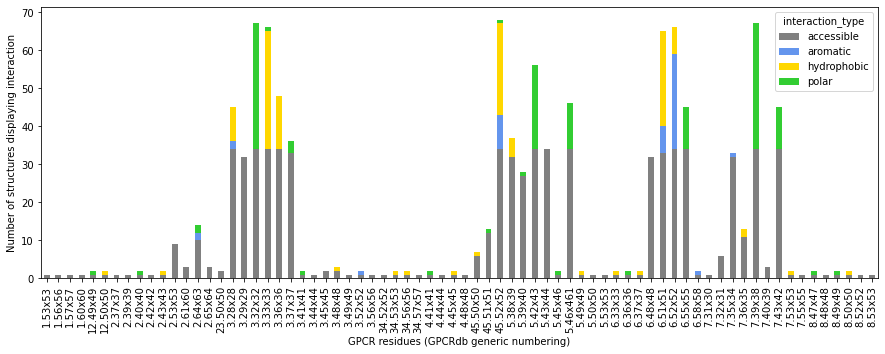

In [22]:
residues_vs_interactions_df.plot.bar(
    figsize=(15, 5),
    stacked=True,
    xlabel="GPCR residues (GPCRdb generic numbering)",
    ylabel="Number of structures displaying interaction",
    color=["grey", "cornflowerblue", "gold", "limegreen"],
);

#### Interaction type count per residue by receptor state (barplots)

In [23]:
receptor_interactions_by_state = {}
for state in ["active", "inactive"]:
    _df = interactions_by_entry_name(query_receptor, state=state)
    _df2 = get_residues_vs_interactions(_df)
    # Add multicolumn (state and interaction type)
    _df2 = pd.concat([_df2.transpose()], keys=[state], names=["state"]).transpose()
    receptor_interactions_by_state[state] = _df2

# Concat both DataFrames in order to align residues
_tmp = pd.concat(list(receptor_interactions_by_state.values()), axis=1).fillna(0).astype(int)
_tmp

state                      active                              inactive  \
interaction_type       accessible aromatic hydrophobic polar accessible   
display_generic_number                                                    
2.42x42                         1        0           0     0          0   
2.61x60                         1        0           0     0          2   
2.64x63                         8        1           0     1          2   
2.65x64                         1        0           0     0          2   
23.50x50                        1        0           0     0          1   
...                           ...      ...         ...   ...        ...   
8.48x48                         0        0           0     0          1   
8.49x49                         0        0           0     0          1   
8.50x50                         0        0           0     0          1   
8.52x52                         0        0           0     0          1   
8.53x53                         0        0           0     0          1   

state                                              
interaction_type       aromatic hydrophobic polar  
display_generic_number                             
2.42x42                       0           0     0  
2.61x60                       0           0     0  
2.64x63                       1           0     1  
2.65x64                       0           0     0  
23.50x50                      0           0     0  
...                         ...         ...   ...  
8.48x48                       0           0     0  
8.49x49                       0           0     1  
8.50x50                       0           1     0  
8.52x52                       0           0     0  
8.53x53                       0           0     0  

[72 rows x 8 columns]

In [24]:
# Sort residues (index)
# Requires the trick of replacing 1. with 10. etc for correct sorting
_index_tmp = []
for i in _tmp.index:
    i1, i2 = i.split(".")[0], i.split(".")[1]
    if len(i1) == 1:
        i_new = f"{i1}0.{i2}"
    else:
        i_new = i
    _index_tmp.append(i_new)
_tmp.index = _index_tmp
_tmp = _tmp.sort_index()
_tmp

state                active                              inactive           \
interaction_type accessible aromatic hydrophobic polar accessible aromatic   
10.53x53                  0        0           0     0          1        0   
10.56x56                  0        0           0     0          1        0   
10.57x57                  0        0           0     0          1        0   
10.60x60                  0        0           0     0          1        0   
12.49x49                  0        0           0     0          1        0   
...                     ...      ...         ...   ...        ...      ...   
80.48x48                  0        0           0     0          1        0   
80.49x49                  0        0           0     0          1        0   
80.50x50                  0        0           0     0          1        0   
80.52x52                  0        0           0     0          1        0   
80.53x53                  0        0           0     0          1        0   

state                               
interaction_type hydrophobic polar  
10.53x53                   0     0  
10.56x56                   0     0  
10.57x57                   0     0  
10.60x60                   0     0  
12.49x49                   0     1  
...                      ...   ...  
80.48x48                   0     0  
80.49x49                   0     1  
80.50x50                   1     0  
80.52x52                   0     0  
80.53x53                   0     0  

[72 rows x 8 columns]

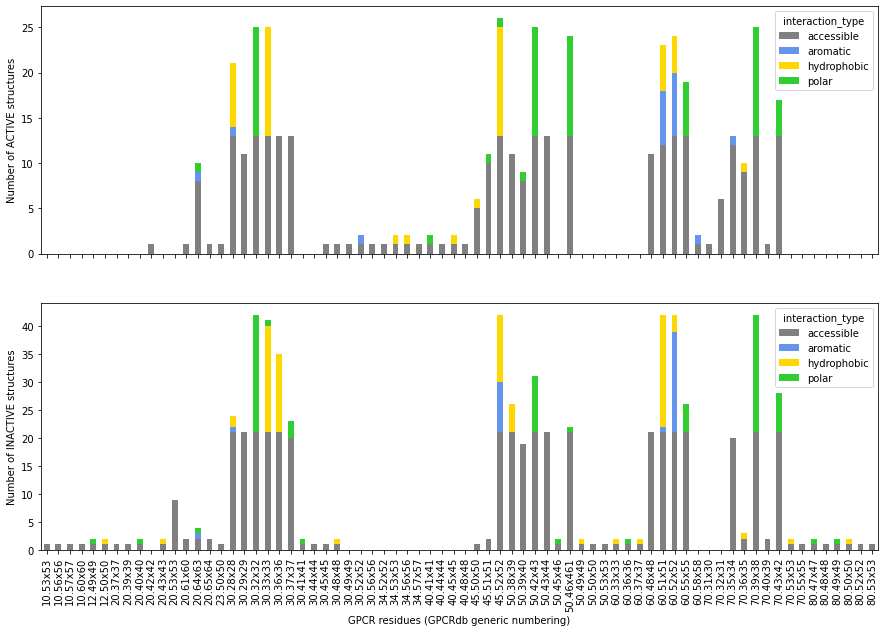

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
for ax, state in zip([ax1, ax2], ["active", "inactive"]):
    _tmp[state].plot.bar(
        ax=ax,
        stacked=True,
        xlabel="GPCR residues (GPCRdb generic numbering)",
        ylabel=f"Number of {state.upper()} structures",
        color=["grey", "cornflowerblue", "gold", "limegreen"],
    );

## Discussion

Wrap up the talktorial's content here and discuss pros/cons and open questions/challenges.

## Quiz

Ask three questions that the user should be able to answer after doing this talktorial. Choose important take-aways from this talktorial for your questions.

1. Question
2. Question
3. Question

<div class="alert alert-block alert-info">

<b>Useful checks at the end</b>: 
    
<ul>
<li>Clear output and rerun your complete notebook. Does it finish without errors?</li>
<li>Check if your talktorial's runtime is as excepted. If not, try to find out which step(s) take unexpectedly long.</li>
<li>Flag code cells with <code># NBVAL_CHECK_OUTPUT</code> that have deterministic output and should be tested within our Continuous Integration (CI) framework.</li>
</ul>

</div>